In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [5]:
data = load_iris()
iris_data = pd.DataFrame(data.data, columns = ["sepal-length", "sepal-width", "petal-length", "petal-width"])
iris_data["class"] = data.target
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


sepal-length       AxesSubplot(0.125,0.536818;0.168478x0.343182)
sepal-width     AxesSubplot(0.327174,0.536818;0.168478x0.343182)
petal-length    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
petal-width     AxesSubplot(0.731522,0.536818;0.168478x0.343182)
class                 AxesSubplot(0.125,0.125;0.168478x0.343182)
dtype: object

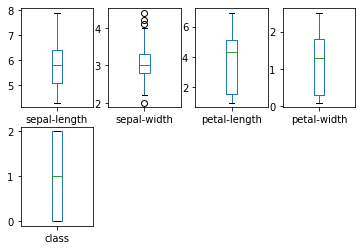

In [21]:
iris_data.plot(kind = 'box', subplots = True, layout = (2,4),sharex = False, sharey = False)

In [27]:
x = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [32]:
models = []
#models.append(('LOGISTIC REGRESSION', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DECISION TREES', DecisionTreeClassifier()))
models.append(('NAIVE BAYES', GaussianNB()))
models.append(('RANDOM FOREST', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

results = []
names = []
for name,model in models:
    folds = KFold(n_splits = 10, shuffle = True, random_state=42)
    cross_val = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = folds)
    results.append(cross_val)
    names.append(name)
    msg = "%s				:	%f" %(name, cross_val.mean())
    print(msg)

LDA				:	0.966667
DECISION TREES				:	0.925000
NAIVE BAYES				:	0.941667
RANDOM FOREST				:	0.916667
KNN				:	0.950000
SVM				:	0.958333
